In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Quikr_car.csv")
df

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   Name        1032 non-null   object
 2   Label       1032 non-null   object
 3   Location    1030 non-null   object
 4   Price       1032 non-null   object
 5   Kms_driven  1032 non-null   object
 6   Fuel_type   1032 non-null   object
 7   Owner       740 non-null    object
 8   Year        1032 non-null   int64 
 9   Company     1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


In [4]:
df.describe()

,Unnamed: 0,Year
count,1032.000000,1032.000000
mean,515.500000,2015.810078
std,298.057042,3.396920
min,0.000000,2000.000000
25%,257.750000,2014.000000
50%,515.500000,2016.000000
75%,773.250000,2018.000000
max,1031.000000,2022.000000


In [5]:
df=df.drop(['Unnamed: 0'], axis='columns')
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [6]:
len(df['Name'].unique())

691

In [7]:
df['Name']= df['Name'].str.split(" ")
df['Name']

0        [Ford, Figo, Duratec, Petrol, EXI, 1.2, -, 2015]
1        [Maruti, Suzuki, Wagon, R, VXI, BS, IV, -, 2016]
2       [Hyundai, Creta, 1.6, SX, PLUS, AUTO, PETROL, ...
3                               [Hyundai, Venue, -, 2019]
4                                  [Honda, Jazz, -, 2017]
                              ...                        
1027                  [Hyundai, i10, Magna, 1.2, -, 2014]
1028       [Maruti, Suzuki, Alto, K10, LXi, CNG, -, 2014]
1029       [Jeep, Compass, Limited, 2.0, Diesel, -, 2017]
1030       [Jeep, Compass, Limited, 2.0, Diesel, -, 2017]
1031       [Jeep, Compass, Limited, 2.0, Diesel, -, 2017]
Name: Name, Length: 1032, dtype: object

In [8]:
df['Name']=df['Name'].str.slice(0,3).str.join(" ")
df['Name']

0          Ford Figo Duratec
1        Maruti Suzuki Wagon
2          Hyundai Creta 1.6
3            Hyundai Venue -
4               Honda Jazz -
                ...         
1027       Hyundai i10 Magna
1028      Maruti Suzuki Alto
1029    Jeep Compass Limited
1030    Jeep Compass Limited
1031    Jeep Compass Limited
Name: Name, Length: 1032, dtype: object

In [9]:
hyphenReplace=lambda x: x.replace('-','')
df['Name']=df['Name'].apply(hyphenReplace)
df['Name']

0          Ford Figo Duratec
1        Maruti Suzuki Wagon
2          Hyundai Creta 1.6
3             Hyundai Venue 
4                Honda Jazz 
                ...         
1027       Hyundai i10 Magna
1028      Maruti Suzuki Alto
1029    Jeep Compass Limited
1030    Jeep Compass Limited
1031    Jeep Compass Limited
Name: Name, Length: 1032, dtype: object

In [10]:
for i in range(9):
    print("The number of null values in Column",i,"are:")
    nullCheck=df.iloc[:,i].isnull().sum()
    print(nullCheck)

The number of null values in Column 0 are:
0
The number of null values in Column 1 are:
0
The number of null values in Column 2 are:
2
The number of null values in Column 3 are:
0
The number of null values in Column 4 are:
0
The number of null values in Column 5 are:
0
The number of null values in Column 6 are:
292
The number of null values in Column 7 are:
0
The number of null values in Column 8 are:
0


In [11]:
df['Location'].unique()

array(['Bangalore', 'Chennai', 'Pune', 'Hyderabad', 'Faridabad',
       'Kanchipuram', 'Kozhikode', 'Kolkata', 'Mumbai', 'Lucknow',
       'Coimbatore', 'Delhi', 'Nanded', 'Malappuram', 'Chandigarh',
       'Madurai', 'BolpurSantiniketan', 'Bhubaneswar', nan, 'Pondicherry',
       'Udaipur', 'NaviMumbai', 'Gurgaon', 'Kurnool', 'Surat',
       'Ahmedabad', 'Jaipur', 'Thane', 'Nagpur', 'Dwarka', 'GirSomnath',
       'Anand', 'Muzaffarnagar', 'Trichy', 'Uttarpara', 'Kochi',
       'Dhanbad', 'Mahasamund', 'Bilaspur', 'Jagdalpur'], dtype=object)

In [12]:
df[df['Location'].isnull()]

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
283,Maruti Suzuki Maruti,GOLD,NaN,"₹65,000","1,08,252 kms",Petrol,NaN,2005,Maruti
887,Honda City ZX,GOLD,NaN,"₹10,69,999","54,000 kms",CNG,1st Owner,2018,Honda


In [13]:
nullLocation= df[df['Location'].isnull()].index
nullLocation

Int64Index([283, 887], dtype='int64')

In [14]:
df=df.drop(nullLocation)
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [15]:
for i in range(9):
    print("The number of null values in Column",i,"are:")
    nullCheck=df.iloc[:,i].isnull().sum()
    print(nullCheck)

The number of null values in Column 0 are:
0
The number of null values in Column 1 are:
0
The number of null values in Column 2 are:
0
The number of null values in Column 3 are:
0
The number of null values in Column 4 are:
0
The number of null values in Column 5 are:
0
The number of null values in Column 6 are:
291
The number of null values in Column 7 are:
0
The number of null values in Column 8 are:
0


In [16]:
df['Price'].unique()

array(['₹3,80,000', '₹4,65,000', '₹13,50,000', '₹10,19,699', '₹7,13,499',
       '₹3,91,099', '₹4,74,299', '₹12,52,999', '₹3,93,699', '₹7,30,899',
       '₹3,43,099', '₹7,07,599', '₹6,88,899', '₹14,21,599', '₹3,99,999',
       '₹14,73,299', '₹10,25,000', '₹7,35,000', '₹6,00,000', '₹8,00,000',
       '₹7,00,000', '₹8,20,000', '₹1,95,000', '₹18,50,000', '₹8,07,499',
       '₹5,22,999', '₹7,40,899', '₹11,41,999', '₹9,71,299', '₹6,40,999',
       '₹6,76,199', '₹5,62,399', '₹5,80,899', '₹7,70,999', '₹5,31,399',
       '₹3,67,299', '₹4,12,199', '₹14,60,099', '₹6,18,699', '₹4,85,000',
       '₹8,90,000', '₹2,45,000', '₹9,45,000', '₹5,90,000', '₹4,95,000',
       '₹4,75,000', '₹12,00,000', '₹4,90,199', '₹9,20,999', '₹5,54,399',
       '₹4,08,999', '₹12,48,299', '₹6,36,099', '₹4,52,699', '₹7,04,399',
       '₹5,53,599', '₹9,99,599', '₹6,84,699', '₹6,20,399', '₹5,49,899',
       '₹8,12,899', '₹6,56,699', '₹7,25,000', '₹37,00,000', '₹3,65,000',
       '₹2,80,000', '₹8,40,000', '₹8,18,599', '₹8,62

In [17]:
len(df['Price'].unique())

802

In [18]:
df['Price']=df['Price'].str.replace(',','')
df['Price']

0        ₹380000
1        ₹465000
2       ₹1350000
3       ₹1019699
4        ₹713499
          ...   
1027     ₹229000
1028     ₹275000
1029    ₹1750000
1030    ₹1750000
1031    ₹1750000
Name: Price, Length: 1030, dtype: object

In [19]:
df['Price']=df['Price'].str.replace('₹','')
df['Price']

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1027     229000
1028     275000
1029    1750000
1030    1750000
1031    1750000
Name: Price, Length: 1030, dtype: object

In [20]:
df['Price'].min()

'1000000'

In [21]:
askForPrice=df[df['Price']=='Ask For Price'].index
askForPrice

Int64Index([260, 316, 356, 546, 644, 934], dtype='int64')

In [22]:
df=df.drop(askForPrice)
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,"35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,"44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,"42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue,PLATINUM,Chennai,1019699,"16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz,PLATINUM,Pune,713499,"30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,229000,"65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,"60,000 kms",Petrol,NaN,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,"31,000 kms",Diesel,1st Owner,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,"31,000 kms",Diesel,1st Owner,2017,Jeep


In [23]:
askForPrice=df[df['Price']=='Ask For Price'].index
askForPrice

Int64Index([], dtype='int64')

In [24]:
df['Price']=pd.to_numeric(df["Price"])
df['Price']

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1027     229000
1028     275000
1029    1750000
1030    1750000
1031    1750000
Name: Price, Length: 1024, dtype: int64

In [25]:
df['Price'].min()

39000

In [26]:
df['Kms_driven'].unique()

array(['35,056 kms ', '44,000 kms ', '42,917 kms ', '16,112 kms ',
       '30,988 kms ', '69,163 kms ', '42,859 kms ', '34,919 kms ',
       '44,940 kms ', '13,687 kms ', '29,848 kms ', '21,426 kms ',
       '68,177 kms ', '70,650 kms ', '25,730 kms ', '47,096 kms ',
       '1,31,000 kms ', '26,000 kms ', '58,460 kms ', '48,000 kms ',
       '26,600 kms ', '36,000 kms ', '39,500 kms ', '76,000 kms ',
       '23,698 kms ', '37,860 kms ', '91,830 kms ', '31,172 kms ',
       '3,243 kms ', '9,616 kms ', '30,249 kms ', '60,875 kms ',
       '25,740 kms ', '38,587 kms ', '3,108 kms ', '35,353 kms ',
       '34,748 kms ', '2,359 kms ', '17,814 kms ', '68,934 kms ',
       '72,600 kms ', '81,000 kms ', '80,000 kms ', '12,000 kms ',
       '6,000 kms ', '56,000 kms ', '15,840 kms ', '32,482 kms ',
       '1,13,779 kms ', '26,150 kms ', '34,555 kms ', '30,880 kms ',
       '70,423 kms ', '30,232 kms ', '50,077 kms ', '18,482 kms ',
       '10,246 kms ', '25,021 kms ', '70,646 kms ', '45,490 kms

In [27]:
df['Kms_driven']=df['Kms_driven'].str.replace(',','')
df['Kms_driven']

0       35056 kms 
1       44000 kms 
2       42917 kms 
3       16112 kms 
4       30988 kms 
           ...    
1027    65000 kms 
1028    60000 kms 
1029    31000 kms 
1030    31000 kms 
1031    31000 kms 
Name: Kms_driven, Length: 1024, dtype: object

In [28]:
df['Kms_driven']=df['Kms_driven'].str.replace('kms','')
df['Kms_driven']

0       35056  
1       44000  
2       42917  
3       16112  
4       30988  
         ...   
1027    65000  
1028    60000  
1029    31000  
1030    31000  
1031    31000  
Name: Kms_driven, Length: 1024, dtype: object

In [29]:
df['Kms_driven'].min()

'0  '

In [30]:
df['Kms_driven']=pd.to_numeric(df["Kms_driven"])
df['Kms_driven']

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1027    65000
1028    60000
1029    31000
1030    31000
1031    31000
Name: Kms_driven, Length: 1024, dtype: int64

In [31]:
df['Kms_driven'].min()

0

In [32]:
df['Owner'].unique()

array([nan, ' 2nd Owner', ' 1st Owner', ' 3rd Owner'], dtype=object)

In [33]:
for i in range(9):
    print("The number of null values in Column",i,"are:")
    nullCheck=df.iloc[:,i].isnull().sum()
    print(nullCheck)

The number of null values in Column 0 are:
0
The number of null values in Column 1 are:
0
The number of null values in Column 2 are:
0
The number of null values in Column 3 are:
0
The number of null values in Column 4 are:
0
The number of null values in Column 5 are:
0
The number of null values in Column 6 are:
287
The number of null values in Column 7 are:
0
The number of null values in Column 8 are:
0


In [34]:
df=df.drop(['Owner'], axis='columns')
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz,PLATINUM,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,2017,Jeep


In [35]:
for i in range(8):
    print("The number of null values in Column",i,"are:")
    nullCheck=df.iloc[:,i].isnull().sum()
    print(nullCheck)

The number of null values in Column 0 are:
0
The number of null values in Column 1 are:
0
The number of null values in Column 2 are:
0
The number of null values in Column 3 are:
0
The number of null values in Column 4 are:
0
The number of null values in Column 5 are:
0
The number of null values in Column 6 are:
0
The number of null values in Column 7 are:
0


In [36]:
df['Label'].unique()

array(['PLATINUM', 'GOLD'], dtype=object)

In [37]:
labels={'PLATINUM':2, 'GOLD':1}
df=df.replace(labels)
df

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,2,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,2,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,2,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue,2,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz,2,Pune,713499,30988,Petrol,2017,Honda
...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,Bangalore,229000,65000,Petrol,2014,Hyundai
1028,Maruti Suzuki Alto,1,Bangalore,275000,60000,Petrol,2014,Maruti
1029,Jeep Compass Limited,1,Mahasamund,1750000,31000,Diesel,2017,Jeep
1030,Jeep Compass Limited,1,Bilaspur,1750000,31000,Diesel,2017,Jeep


In [38]:
len(df['Fuel_type'].unique())

10

In [39]:
len(df['Location'].unique())

39

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit_transform(df['Location'])

array([ 2,  2,  2, ..., 25,  4, 16])

In [41]:
dummies1= pd.get_dummies(df['Location'])
dummies1

,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,Chennai,Coimbatore,Delhi,...,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur,Uttarpara
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df=df.drop(['Location'], axis='columns')
df=pd.concat([df,dummies1], axis='columns')
df

,Name,Label,Price,Kms_driven,Fuel_type,Year,Company,Ahmedabad,Anand,Bangalore,...,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur,Uttarpara
0,Ford Figo Duratec,2,380000,35056,Petrol,2015,Ford,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki Wagon,2,465000,44000,Petrol,2016,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Creta 1.6,2,1350000,42917,Petrol,2018,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Venue,2,1019699,16112,Petrol,2019,Hyundai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda Jazz,2,713499,30988,Petrol,2017,Honda,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,Petrol,2014,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1028,Maruti Suzuki Alto,1,275000,60000,Petrol,2014,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1029,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df=df.drop(df.columns[45],axis='columns')
df

,Name,Label,Price,Kms_driven,Fuel_type,Year,Company,Ahmedabad,Anand,Bangalore,...,Muzaffarnagar,Nagpur,Nanded,NaviMumbai,Pondicherry,Pune,Surat,Thane,Trichy,Udaipur
0,Ford Figo Duratec,2,380000,35056,Petrol,2015,Ford,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki Wagon,2,465000,44000,Petrol,2016,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Creta 1.6,2,1350000,42917,Petrol,2018,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Venue,2,1019699,16112,Petrol,2019,Hyundai,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Honda Jazz,2,713499,30988,Petrol,2017,Honda,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,Petrol,2014,Hyundai,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1028,Maruti Suzuki Alto,1,275000,60000,Petrol,2014,Maruti,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1029,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,Diesel,2017,Jeep,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dummies2=pd.get_dummies(df['Fuel_type'])
dummies2

,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol,Petrol + CNG
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1027,0,0,0,0,0,0,0,0,1,0
1028,0,0,0,0,0,0,0,1,0,0
1029,0,0,0,1,0,0,0,0,0,0
1030,0,0,0,1,0,0,0,0,0,0


In [45]:
df=df.drop(['Fuel_type'], axis='columns')
df=pd.concat([df,dummies2], axis='columns')
df

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol,Petrol + CNG
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1028,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1029,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df=df.drop(df.columns[53],axis='columns')
df

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1028,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1029,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1030,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df=df.reset_index(drop=True)
df

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1020,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1021,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1022,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Exploratory Data Analysis

In [48]:
sns.set_style("whitegrid")

C:\Users\Shaunak\AppData\Local\Temp\ipykernel_36812\2556266012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<function matplotlib.pyplot.show(close=None, block=None)>

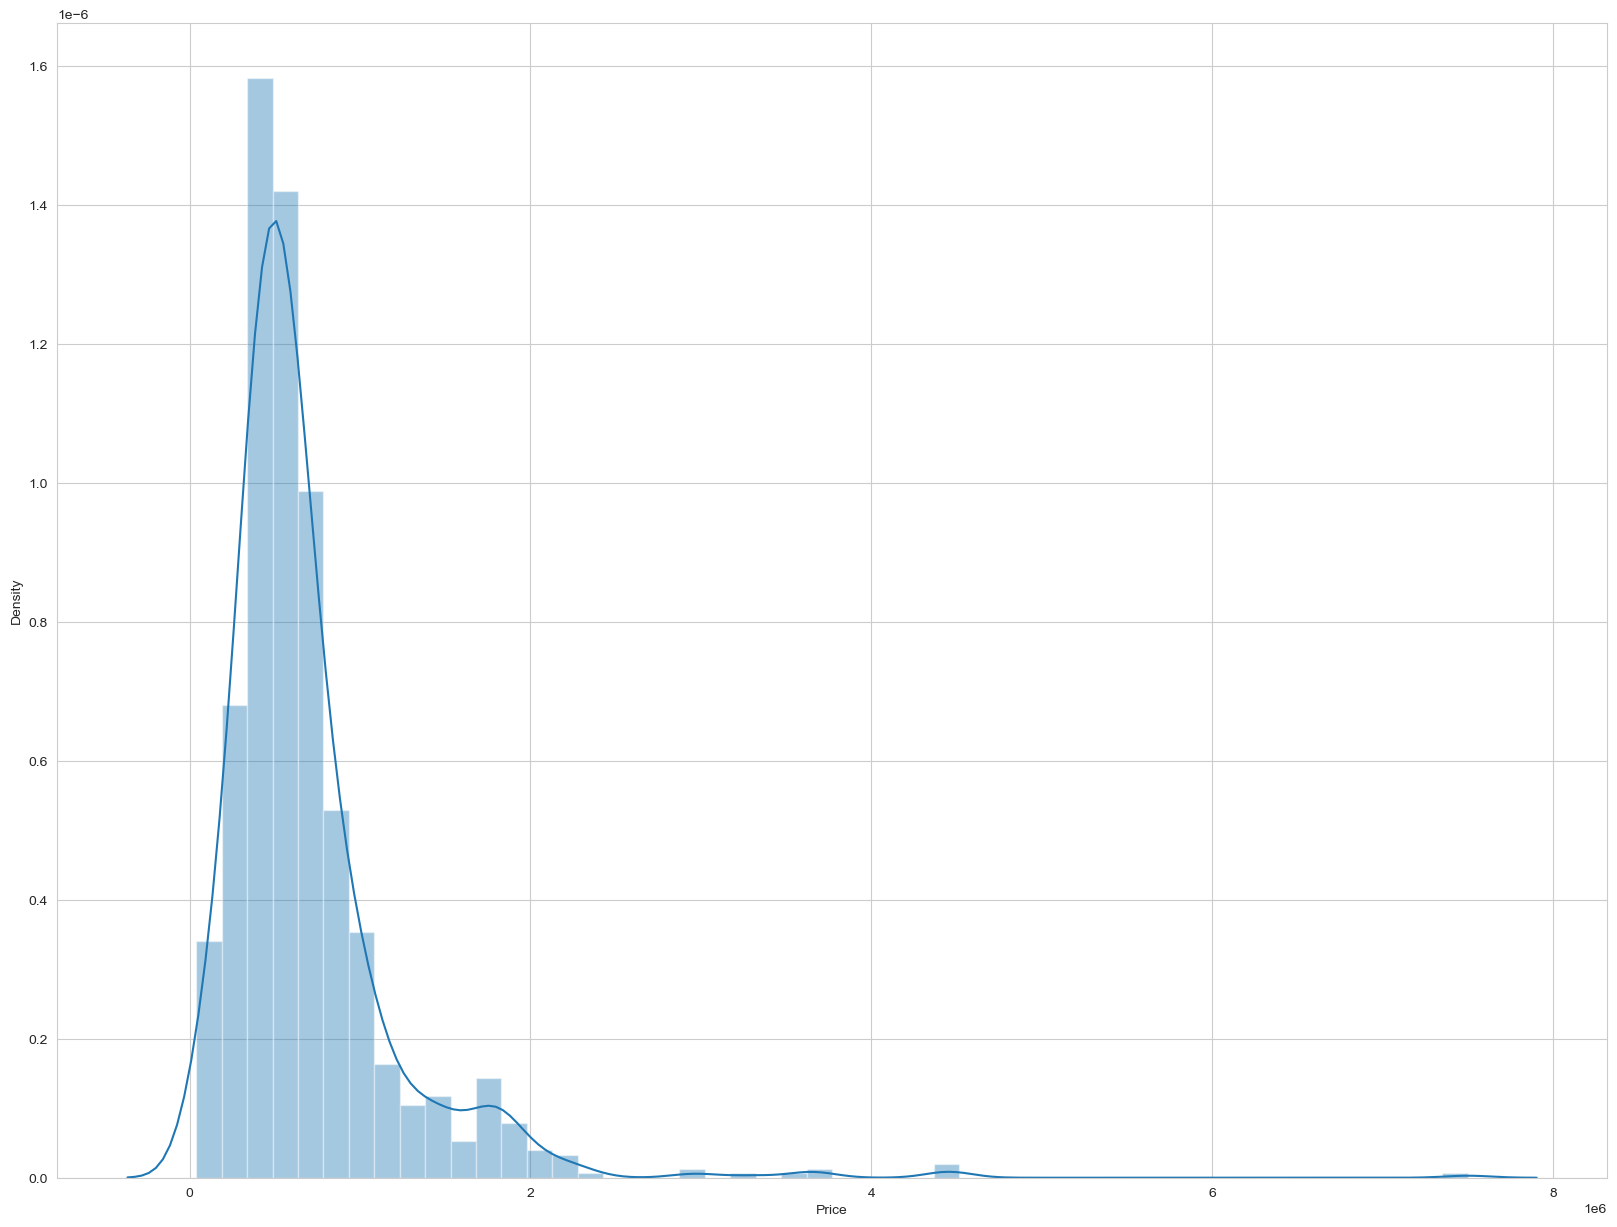

In [49]:
plt.figure(figsize=(20,15))
sns.distplot(df['Price'])
plt.show

C:\Users\Shaunak\AppData\Local\Temp\ipykernel_36812\513323198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


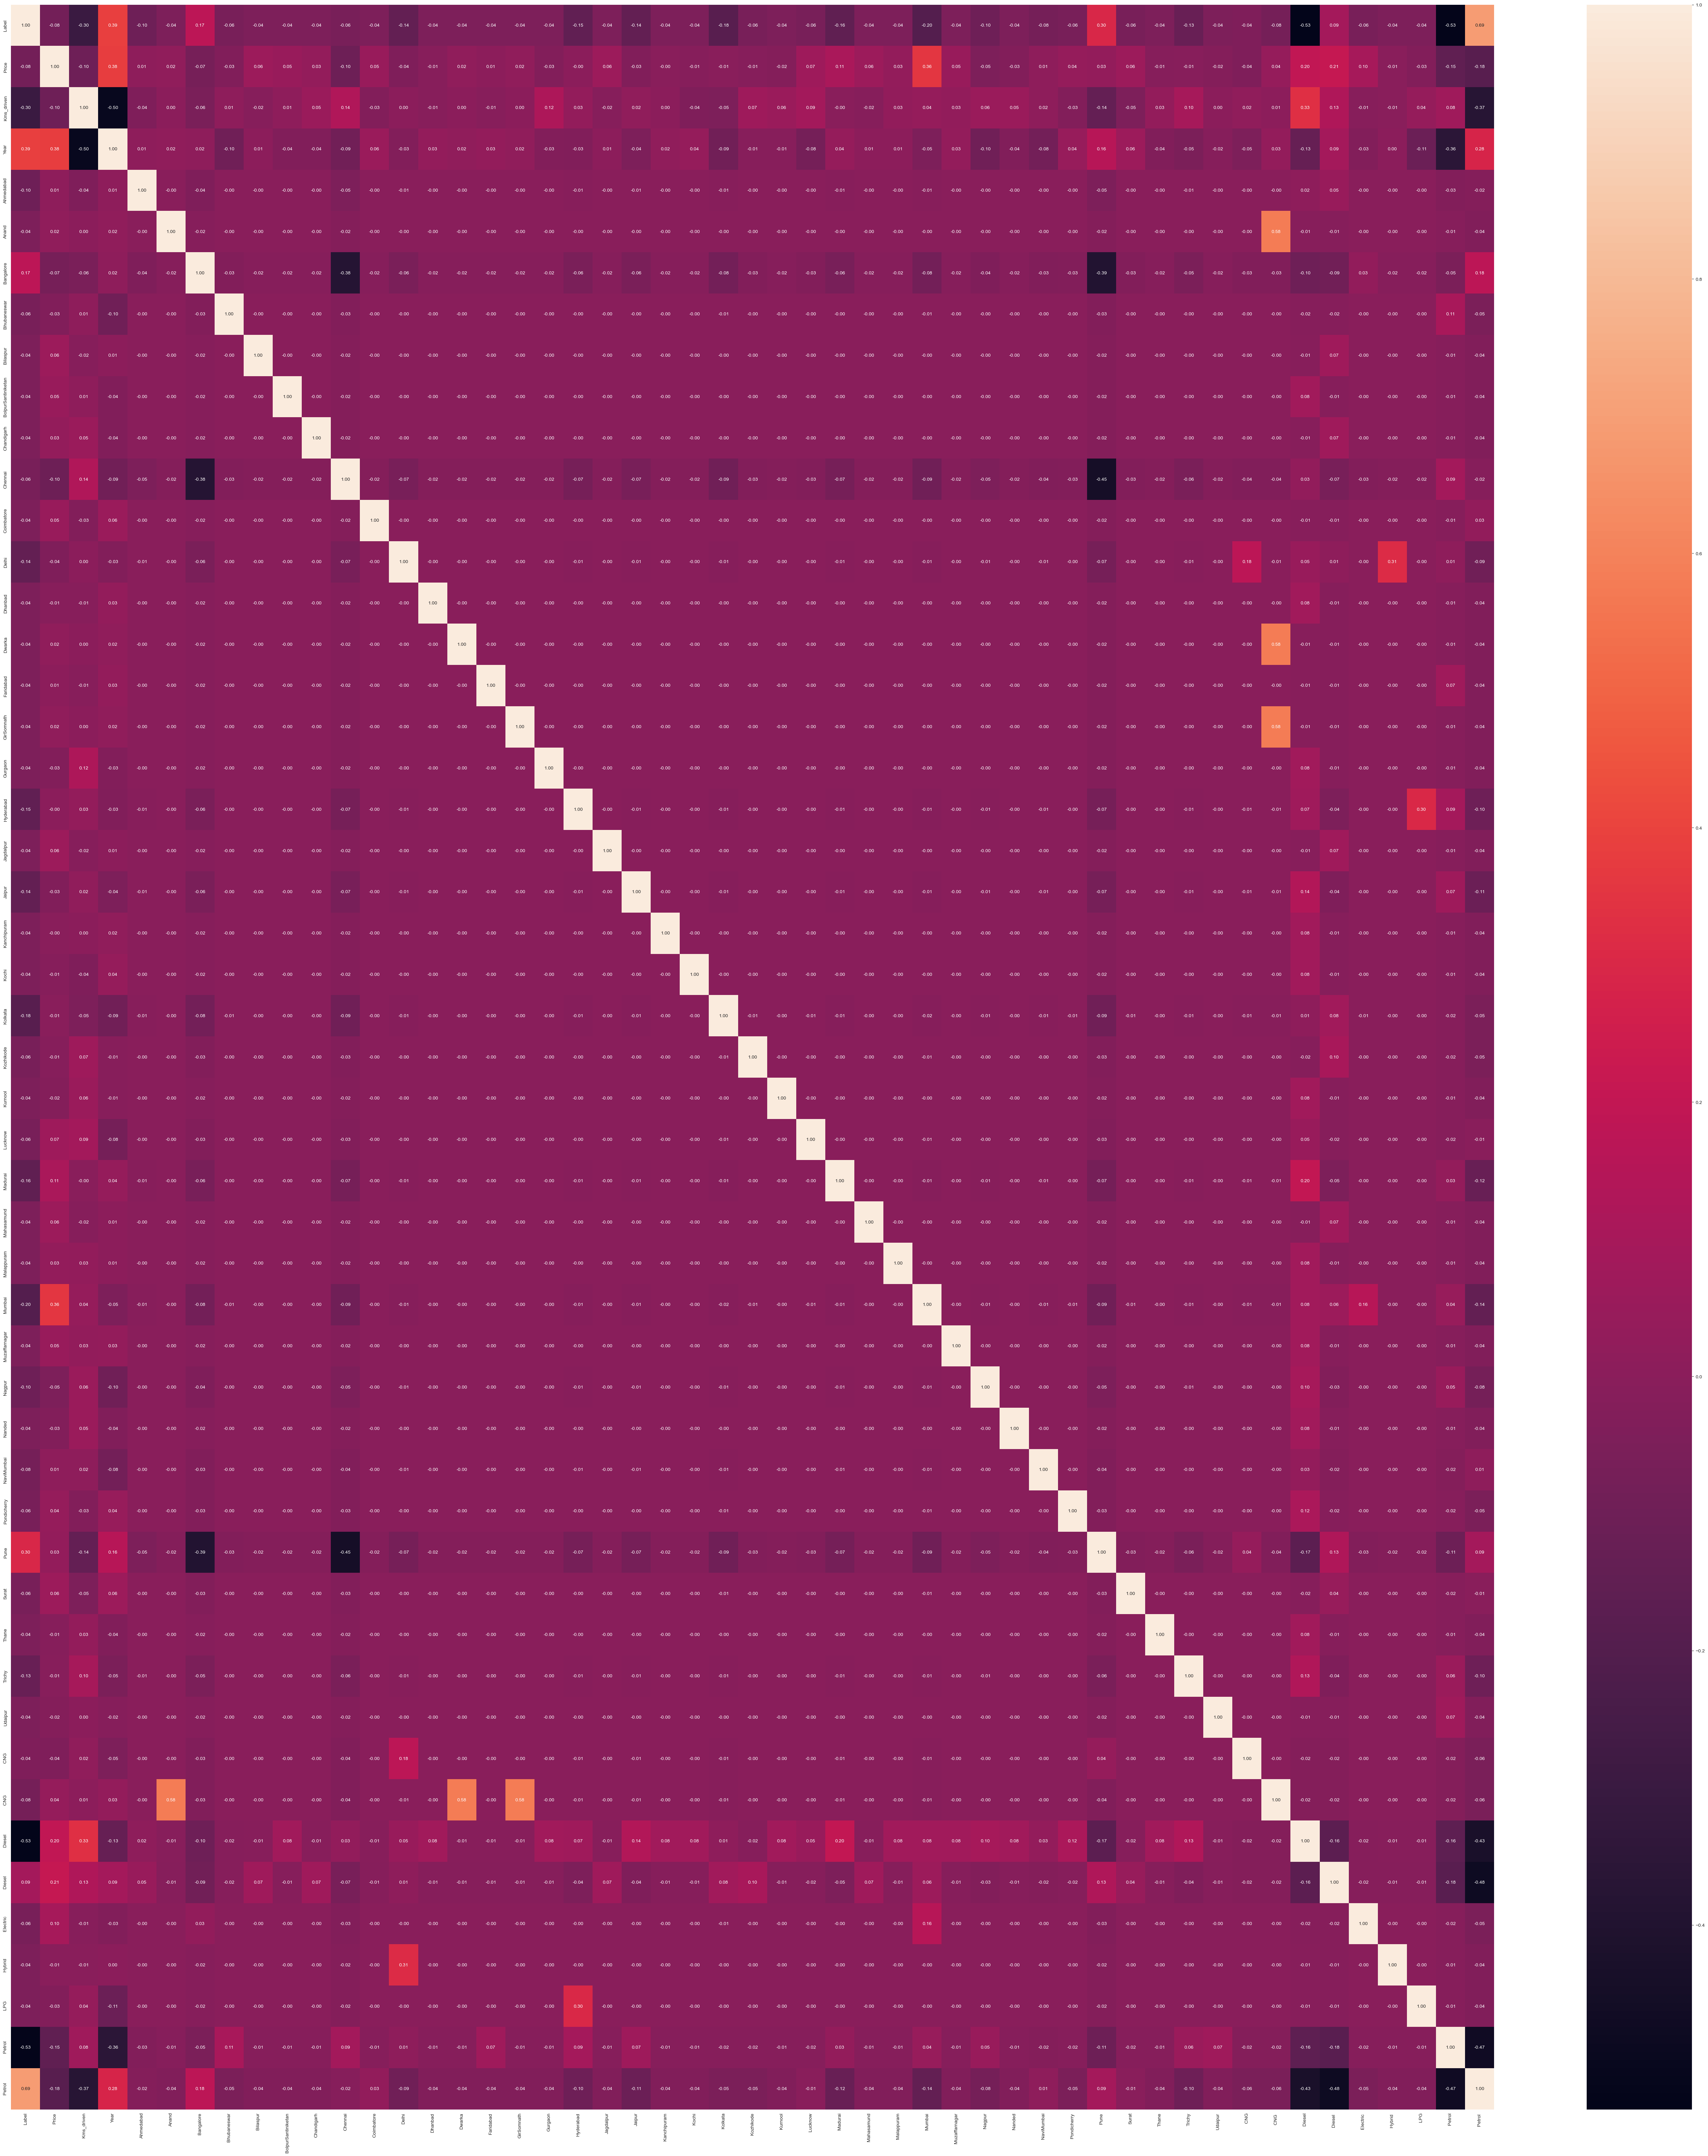

In [50]:
plt.figure(figsize=(70,80))
correlation=df.corr()
sns.heatmap(correlation, annot=True, fmt='0.2f')
plt.show()

In [51]:
label1=df[df['Label']==1]
label1

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
16,Toyota Innova 2.5,1,1025000,131000,2012,Toyota,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
17,Hyundai Elite i20,1,735000,26000,2016,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18,Hyundai Creta 1.6,1,600000,58460,2019,Hyundai,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,Kia Seltos,1,800000,48000,2020,Kia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,Maruti Suzuki Ciaz,1,700000,26600,2017,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Hyundai i10 Magna,1,229000,65000,2014,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1020,Maruti Suzuki Alto,1,275000,60000,2014,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1021,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1022,Jeep Compass Limited,1,1750000,31000,2017,Jeep,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
label2=df[df['Label']==2]
label2

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
0,Ford Figo Duratec,2,380000,35056,2015,Ford,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Maruti Suzuki Wagon,2,465000,44000,2016,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai Creta 1.6,2,1350000,42917,2018,Hyundai,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Hyundai Venue,2,1019699,16112,2019,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Honda Jazz,2,713499,30988,2017,Honda,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Maruti Suzuki Baleno,2,681399,43287,2016,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1012,Datsun Redi GO,2,415699,26527,2018,Datsun,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1013,Maruti Suzuki Alto,2,300199,37801,2017,Maruti,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1014,Maruti Suzuki Vitara,2,856699,54044,2017,Maruti,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


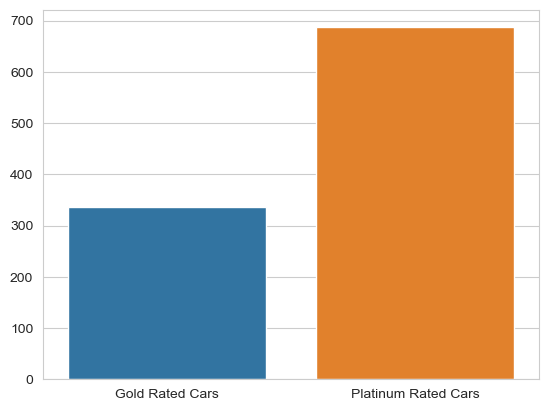

In [53]:
sns.barplot(x=['Gold Rated Cars', 'Platinum Rated Cars'], y=[len(label1),len(label2)])
plt.show()

In [54]:
df2=df.groupby(['Company']).count()
df2

,Name,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
Company,,,,,,,,,,,,,,,,,,,,,
Audi,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
BMW,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Chevrolet,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Datsun,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Fiat,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Ford,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Honda,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Hyundai,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
Jaguar,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [55]:
df3=df2.sort_values(by=['Name'], ascending=False)
df3

,Name,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
Company,,,,,,,,,,,,,,,,,,,,,
Maruti,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
Hyundai,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
Honda,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Ford,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Tata,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
Renault,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
Toyota,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
Mahindra,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
Volkswagen,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


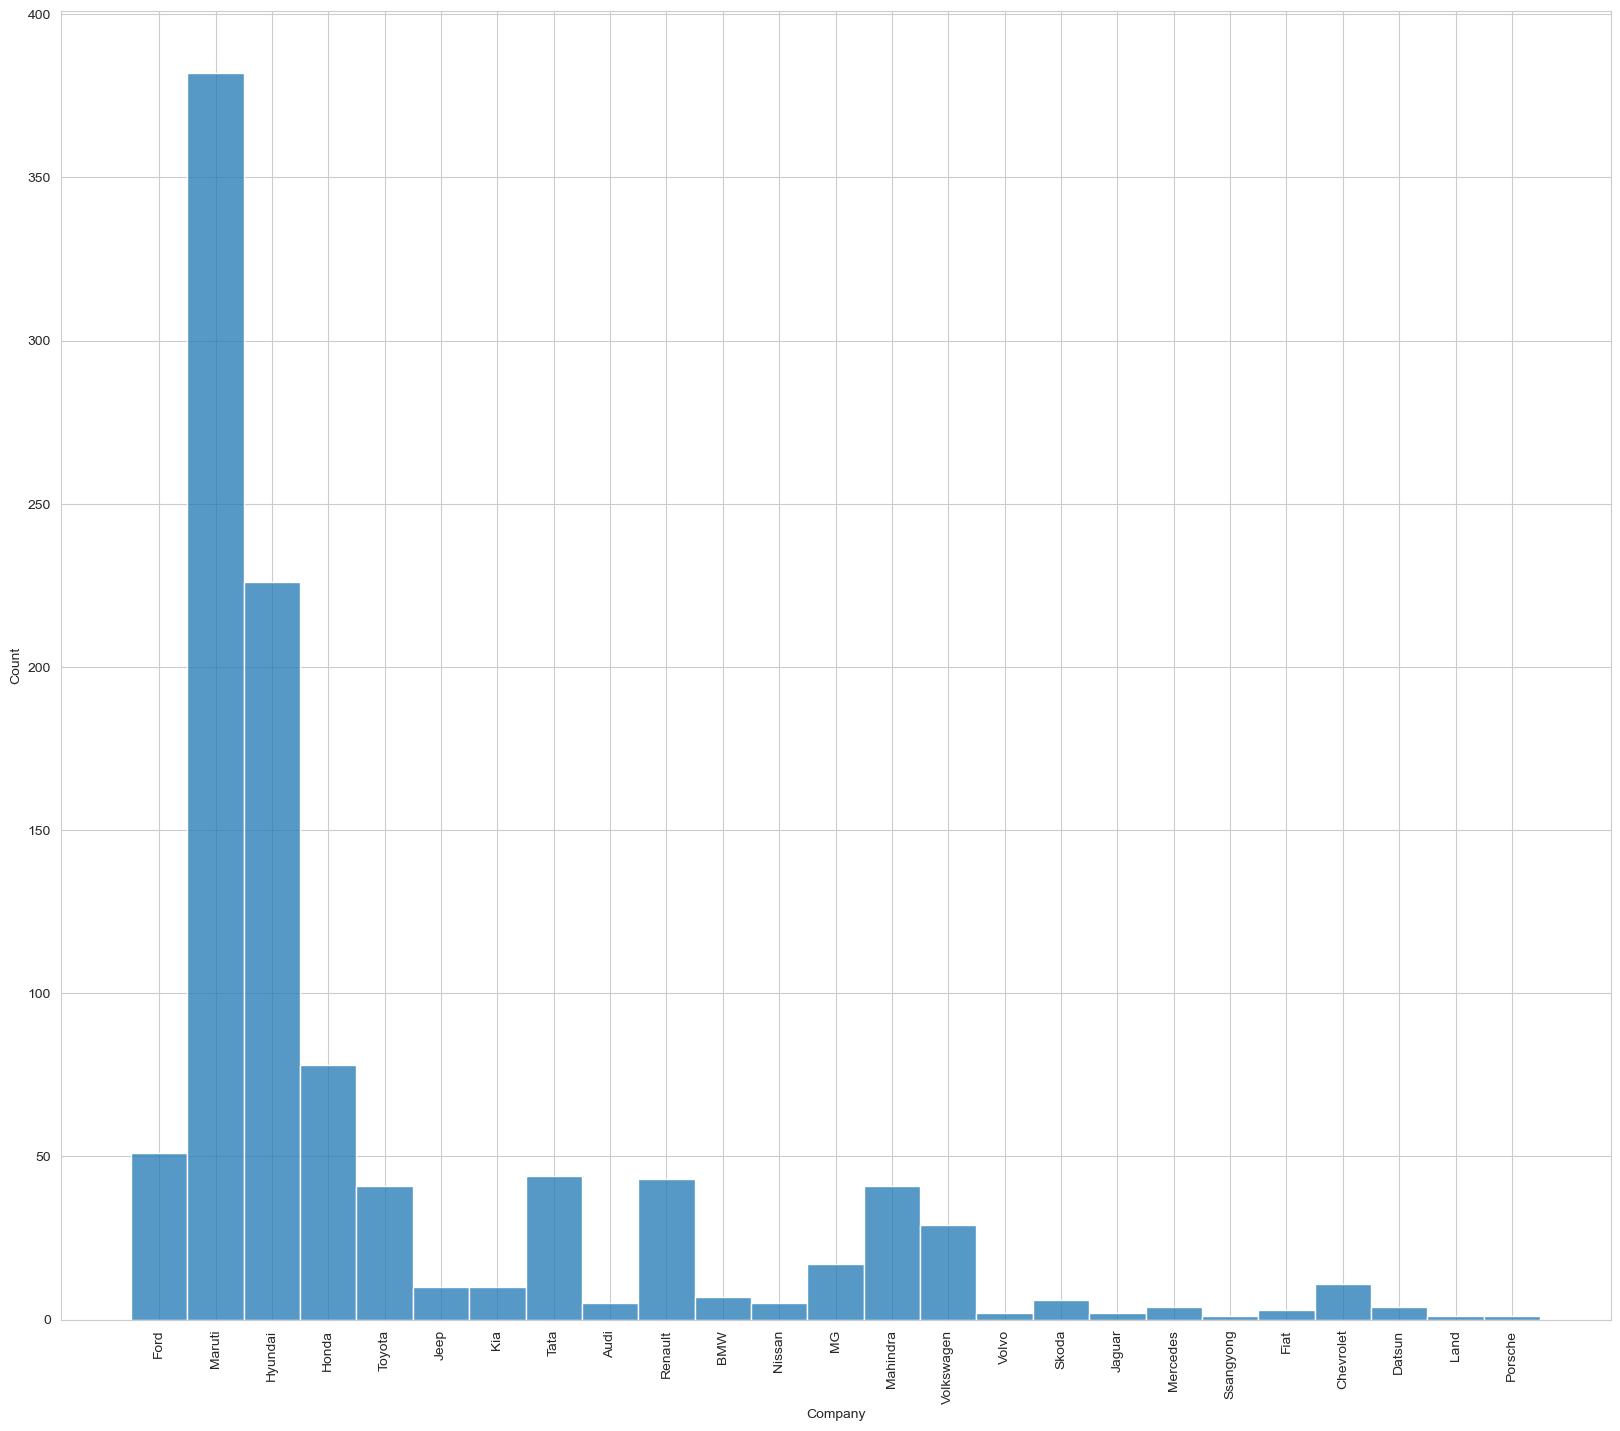

In [56]:
plt.figure(figsize=(20,17))
sns.histplot(x=df['Company'])
plt.xticks(rotation=90)
plt.show()

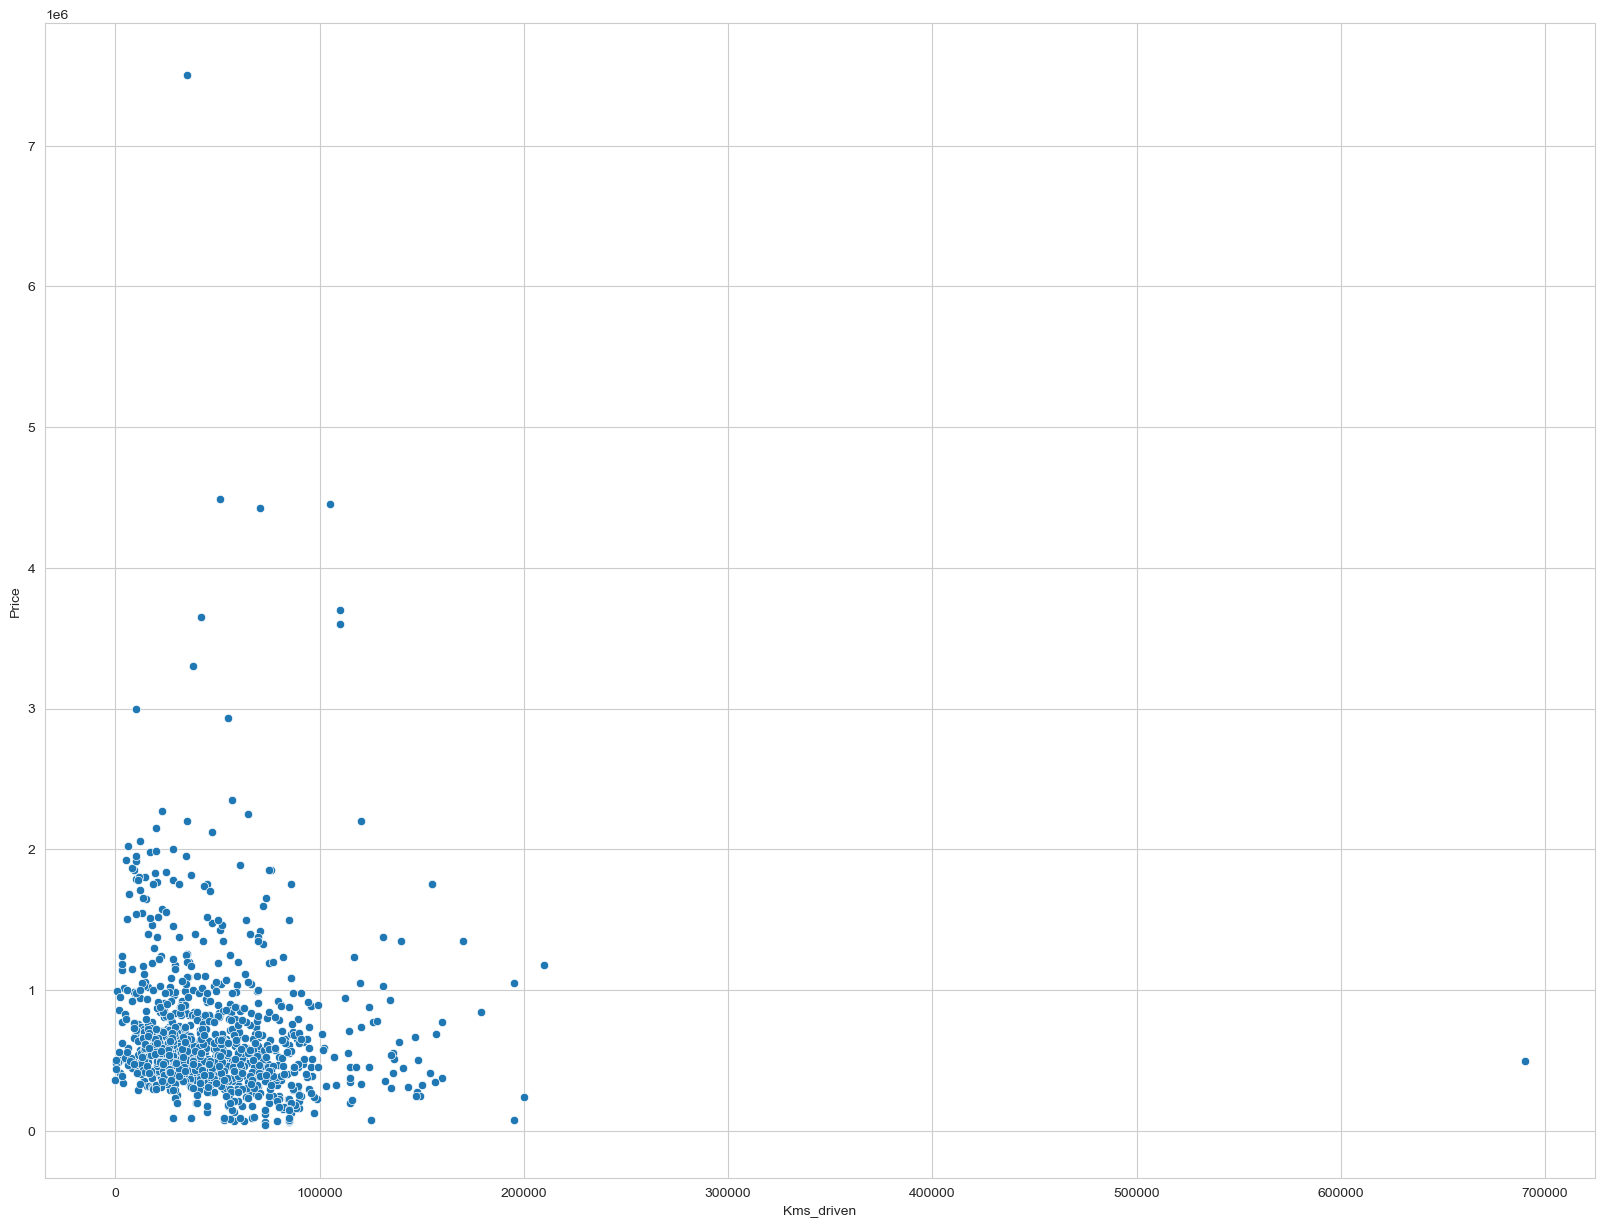

In [57]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df['Kms_driven'],y=df['Price'])
plt.show()

In [58]:
lessKms=df[df['Kms_driven']<=100000]
lessKms=lessKms['Kms_driven']
lessKms

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1019    65000
1020    60000
1021    31000
1022    31000
1023    31000
Name: Kms_driven, Length: 961, dtype: int64

In [59]:
lessPrice=df[df['Price']<=1500000]
lessPrice=lessPrice['Price']
lessPrice

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1016     375000
1017     525000
1018     550000
1019     229000
1020     275000
Name: Price, Length: 955, dtype: int64

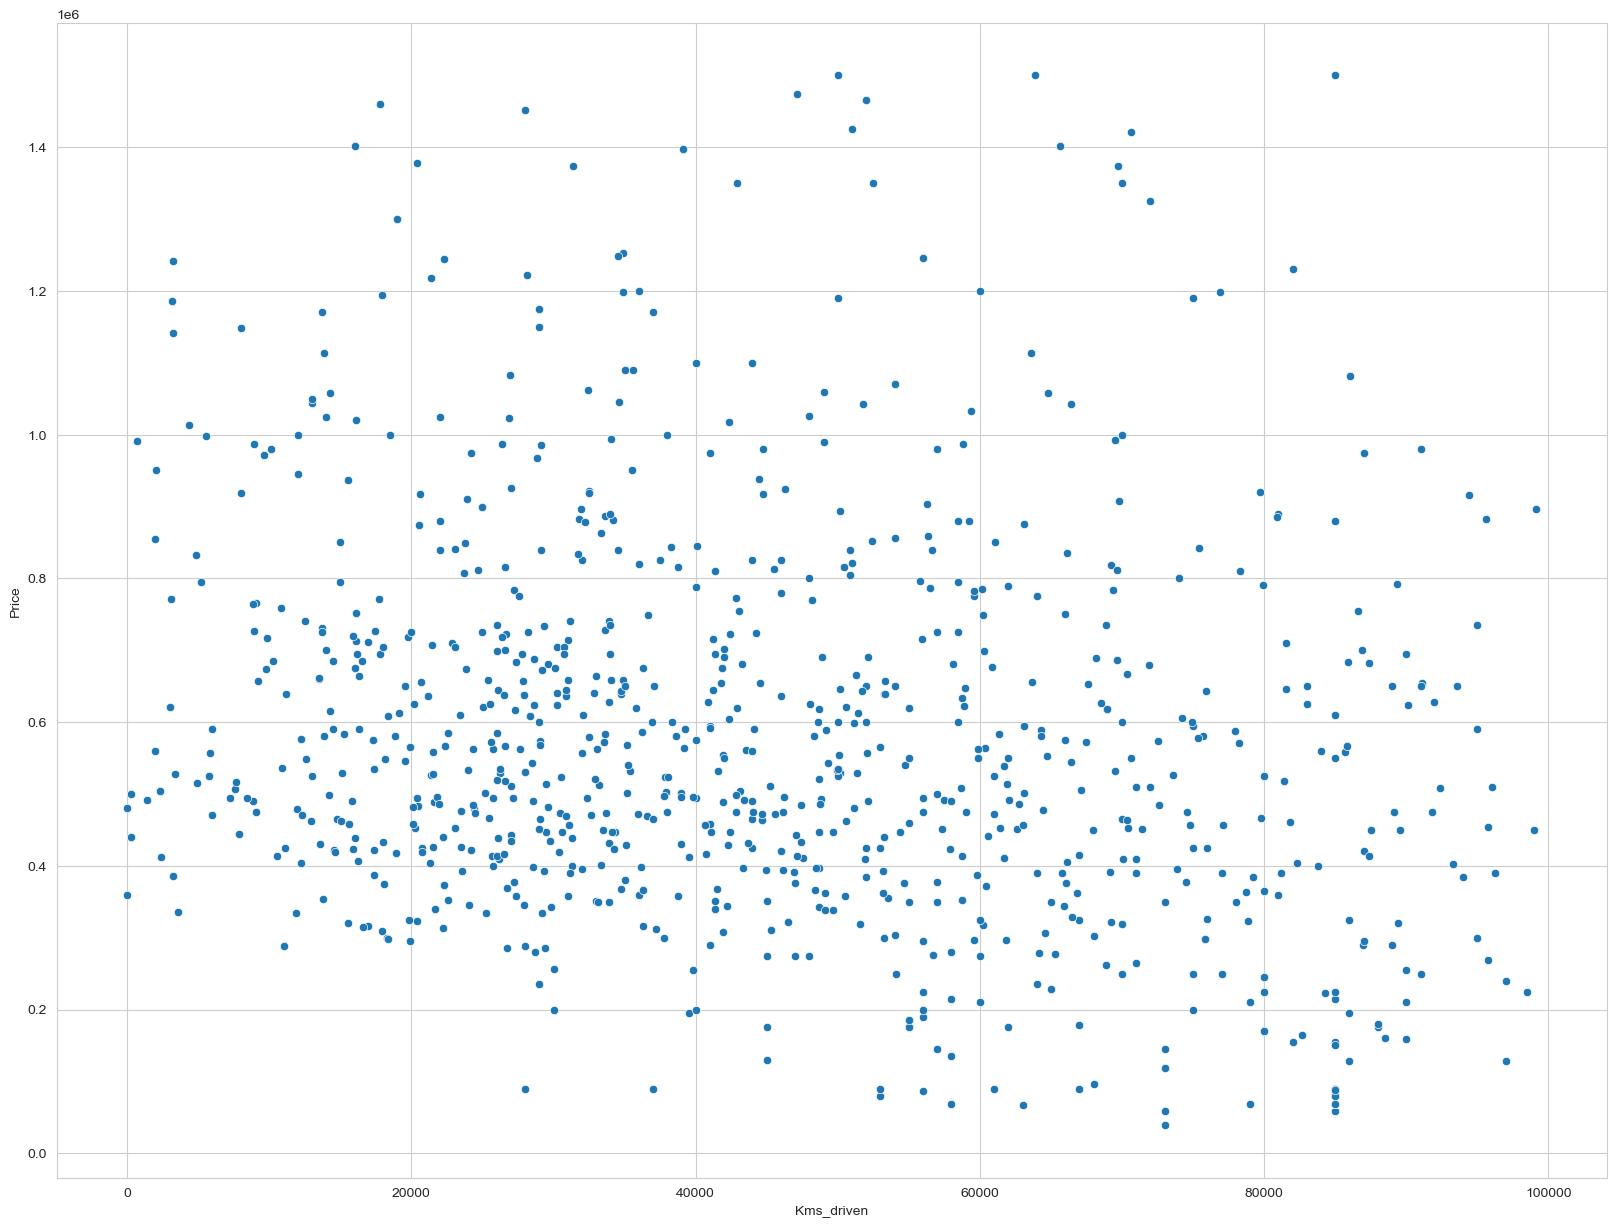

In [60]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=lessKms ,y=lessPrice)
plt.show()

C:\Users\Shaunak\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shaunak\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shaunak\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shaunak\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shaunak\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of t

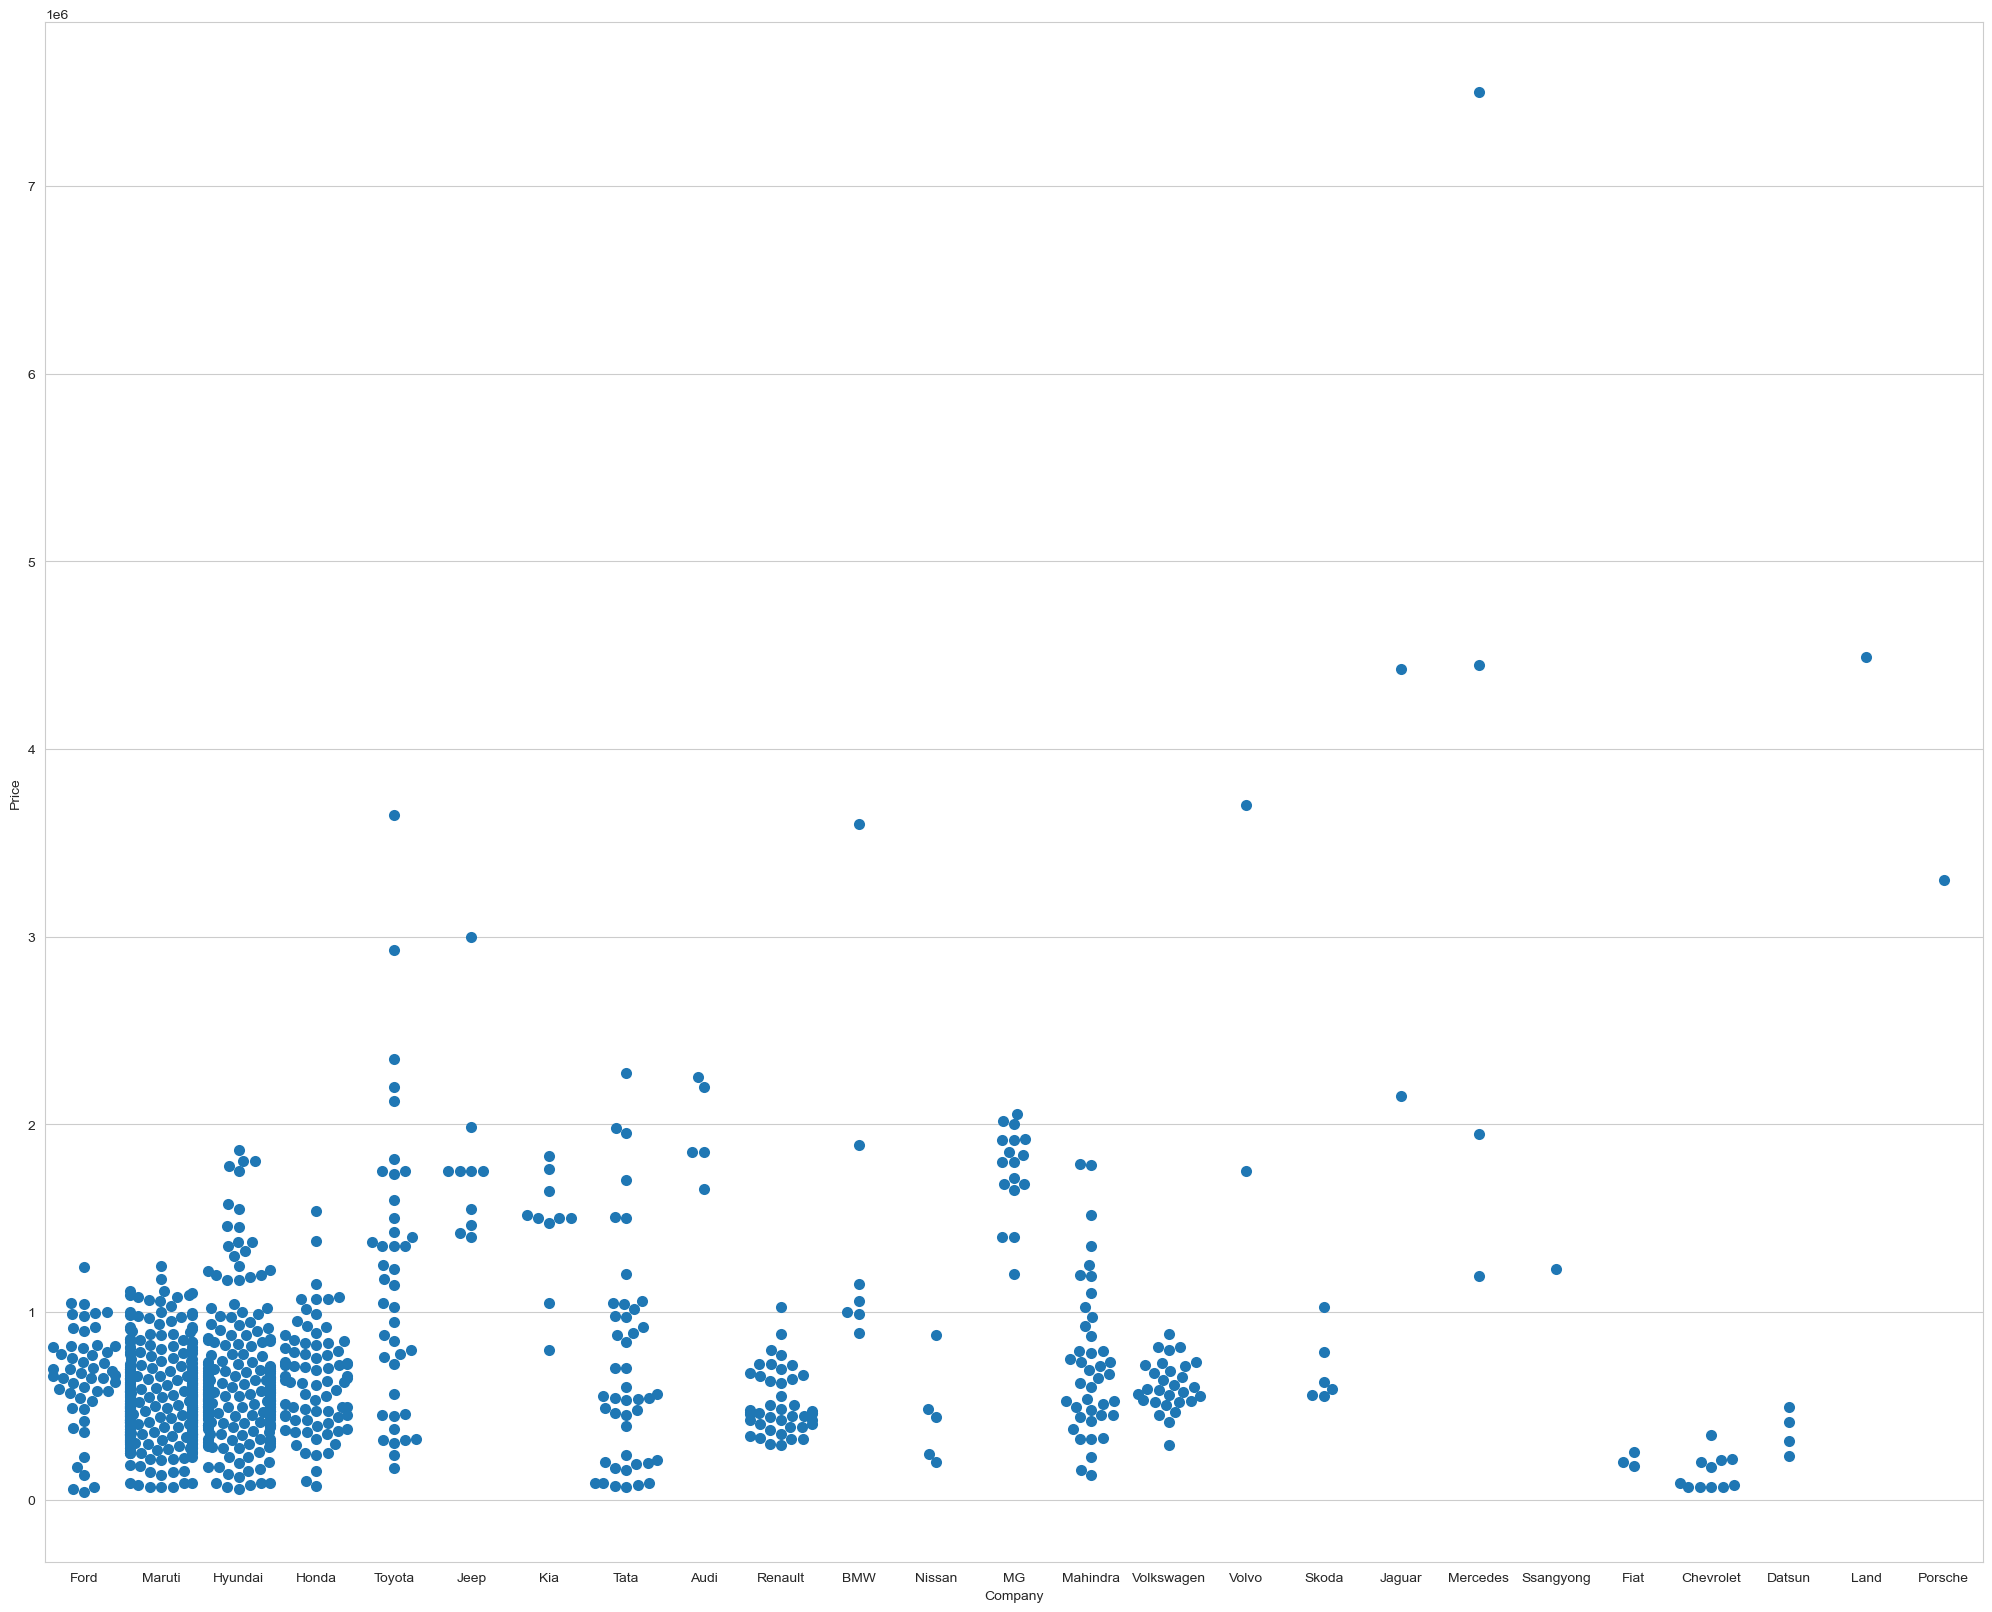

In [61]:
plt.figure(figsize=(25,20))
sns.swarmplot(x=df['Company'], y=df['Price'], size=8)
plt.show()

In [62]:
df3=df.sort_values(by='Price' ,ascending=False)
df3

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
712,Mercedes Benz GLE,1,7500000,35000,2019,Mercedes,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
921,Land Rover Range,1,4490000,51000,2017,Land,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
143,Mercedes Benz GL,1,4450000,105000,2016,Mercedes,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
142,Jaguar XJ L,1,4425000,71000,2016,Jaguar,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66,Volvo XC90 D5,1,3700000,110000,2016,Volvo,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Maruti Suzuki 800,1,69000,85000,2000,Maruti,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
401,Chevrolet Aveo,1,67000,63000,2007,Chevrolet,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
402,Ford Ikon,1,59000,73000,2009,Ford,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
232,Hyundai Santro,1,59000,85000,2001,Hyundai,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
top10=df3[0:10]

top10

,Name,Label,Price,Kms_driven,Year,Company,Ahmedabad,Anand,Bangalore,Bhubaneswar,...,Udaipur,CNG,CNG,Diesel,Diesel,Electric,Hybrid,LPG,Petrol,Petrol
712,Mercedes Benz GLE,1,7500000,35000,2019,Mercedes,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
921,Land Rover Range,1,4490000,51000,2017,Land,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
143,Mercedes Benz GL,1,4450000,105000,2016,Mercedes,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
142,Jaguar XJ L,1,4425000,71000,2016,Jaguar,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66,Volvo XC90 D5,1,3700000,110000,2016,Volvo,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
185,Toyota Fortuner,1,3650000,42000,2019,Toyota,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
611,BMW X5 xDrive30d,1,3600000,110000,2014,BMW,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
923,Porsche Cayenne Select,1,3300000,38000,2011,Porsche,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
95,Jeep Compass Limited,1,3000000,10000,2021,Jeep,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
237,Toyota Fortuner 2.8,1,2931000,55000,2019,Toyota,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


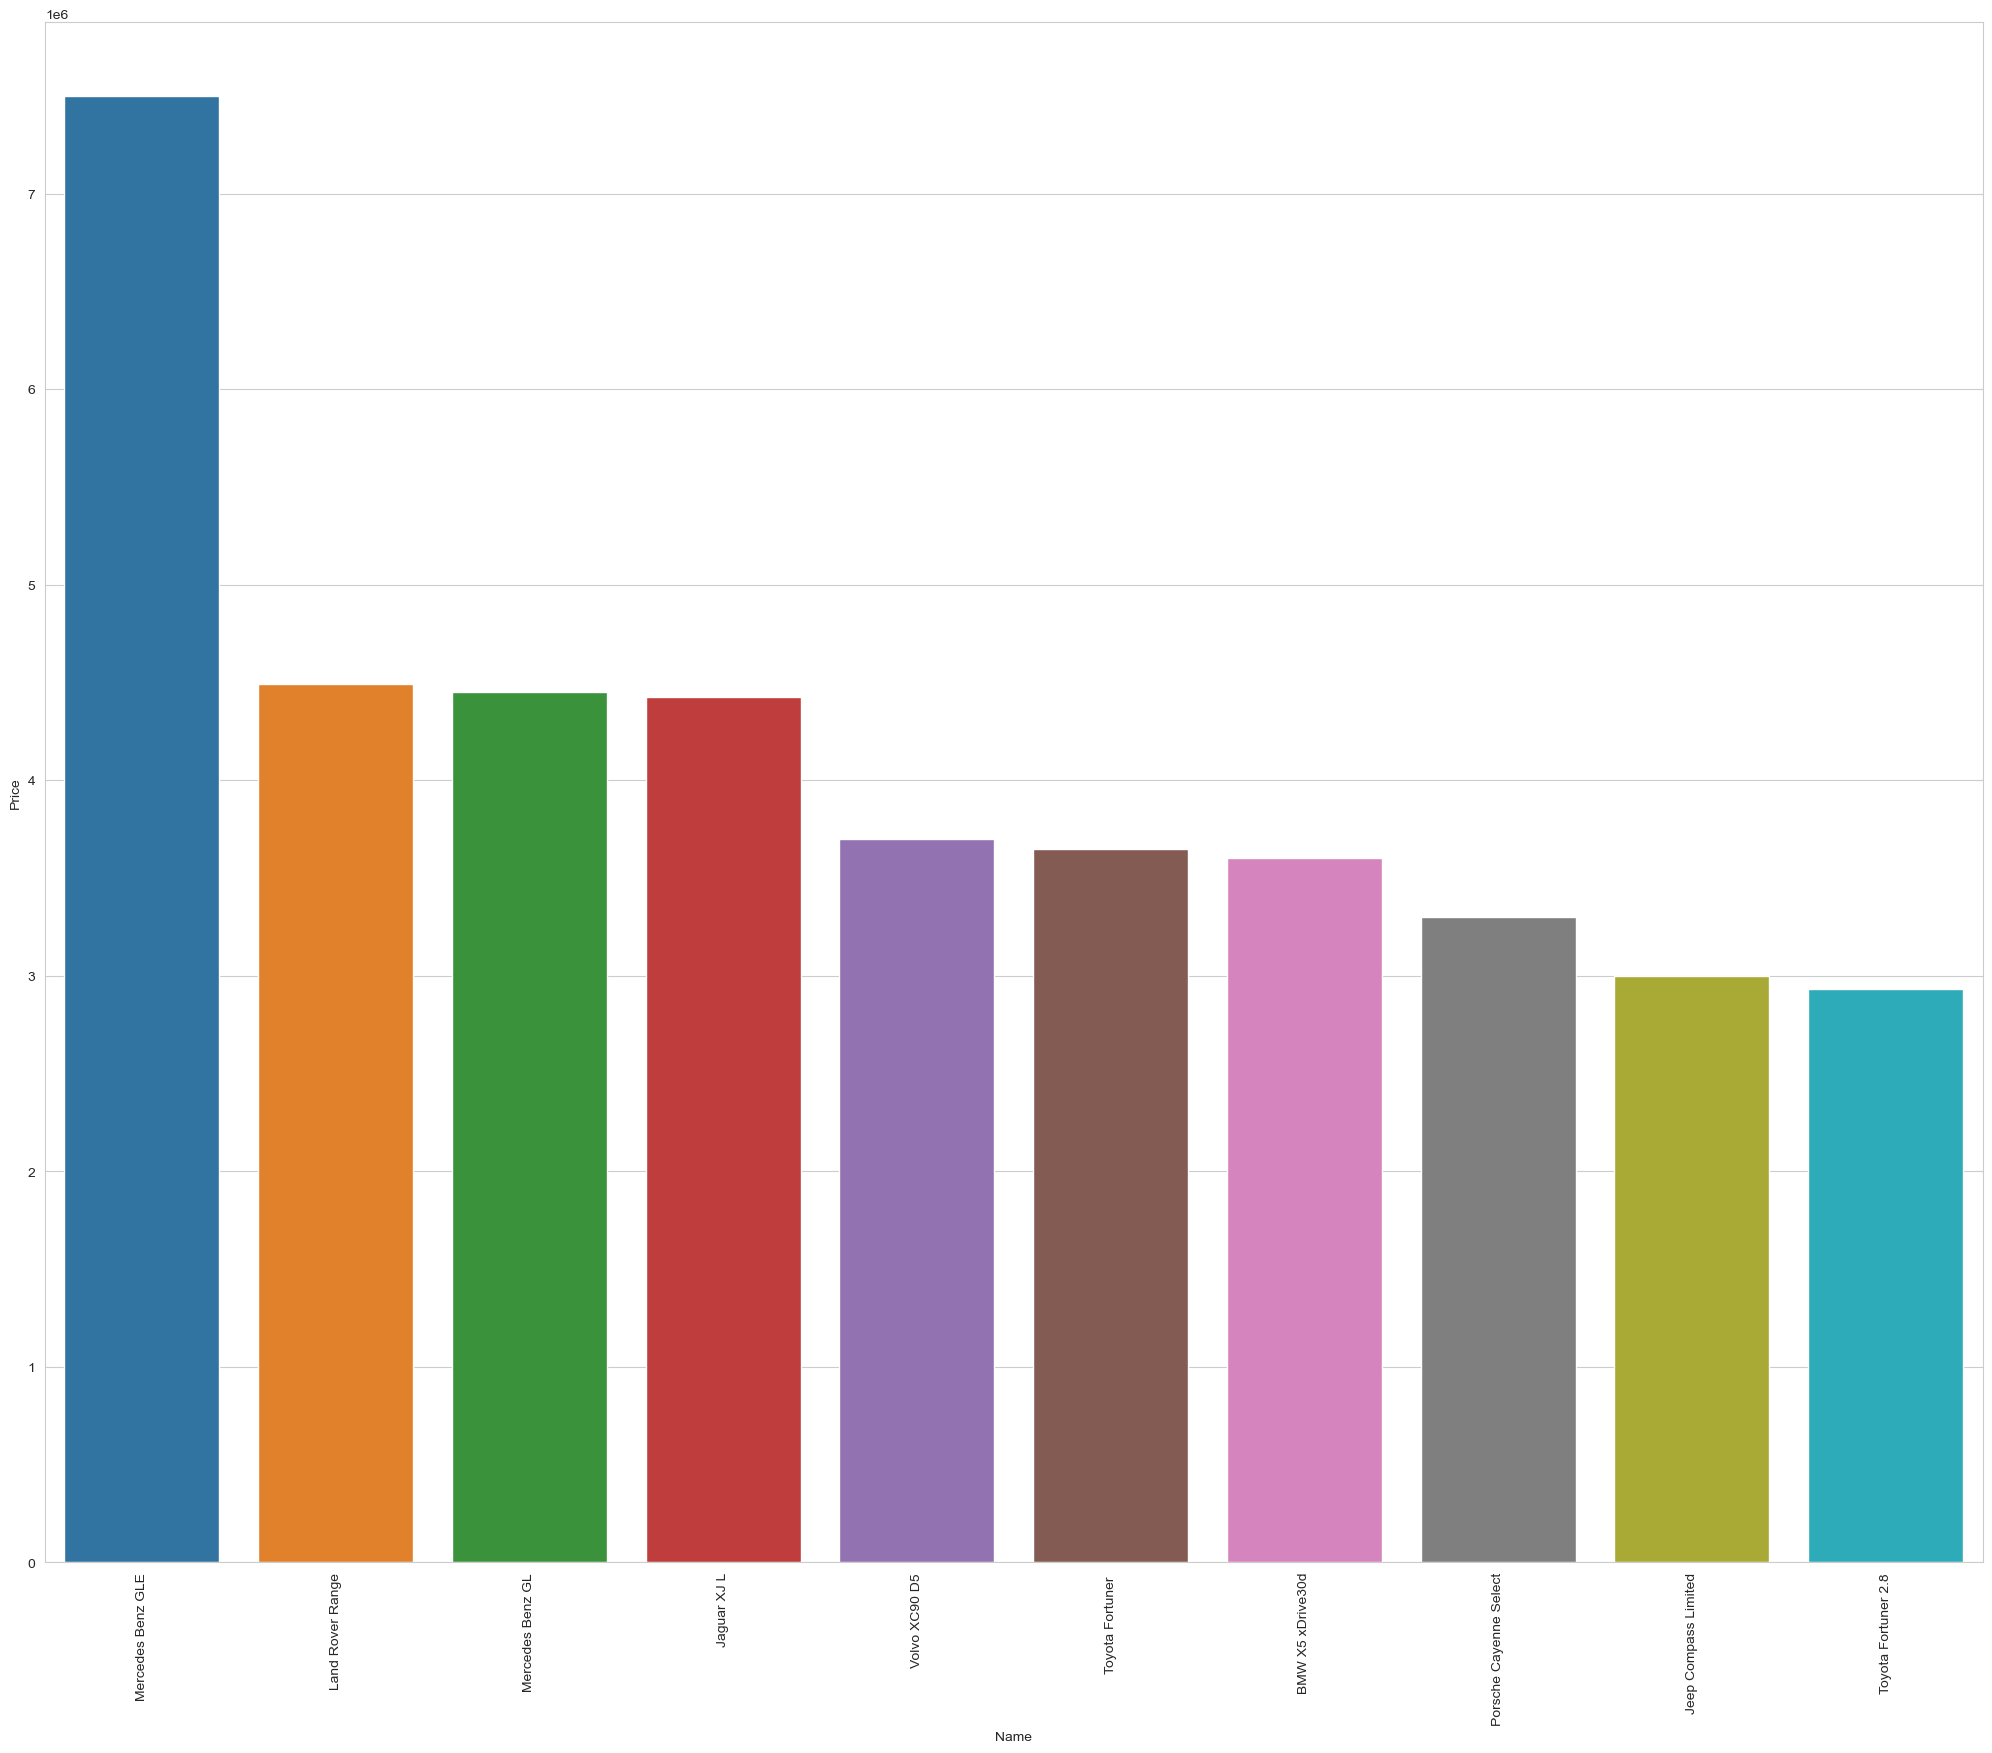

In [64]:
plt.figure(figsize=(25,20))
sns.barplot(x=top10['Name'], y=top10['Price'])
plt.xticks(rotation=90)
plt.show()

C:\Users\Shaunak\AppData\Local\Temp\ipykernel_36812\2344711162.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


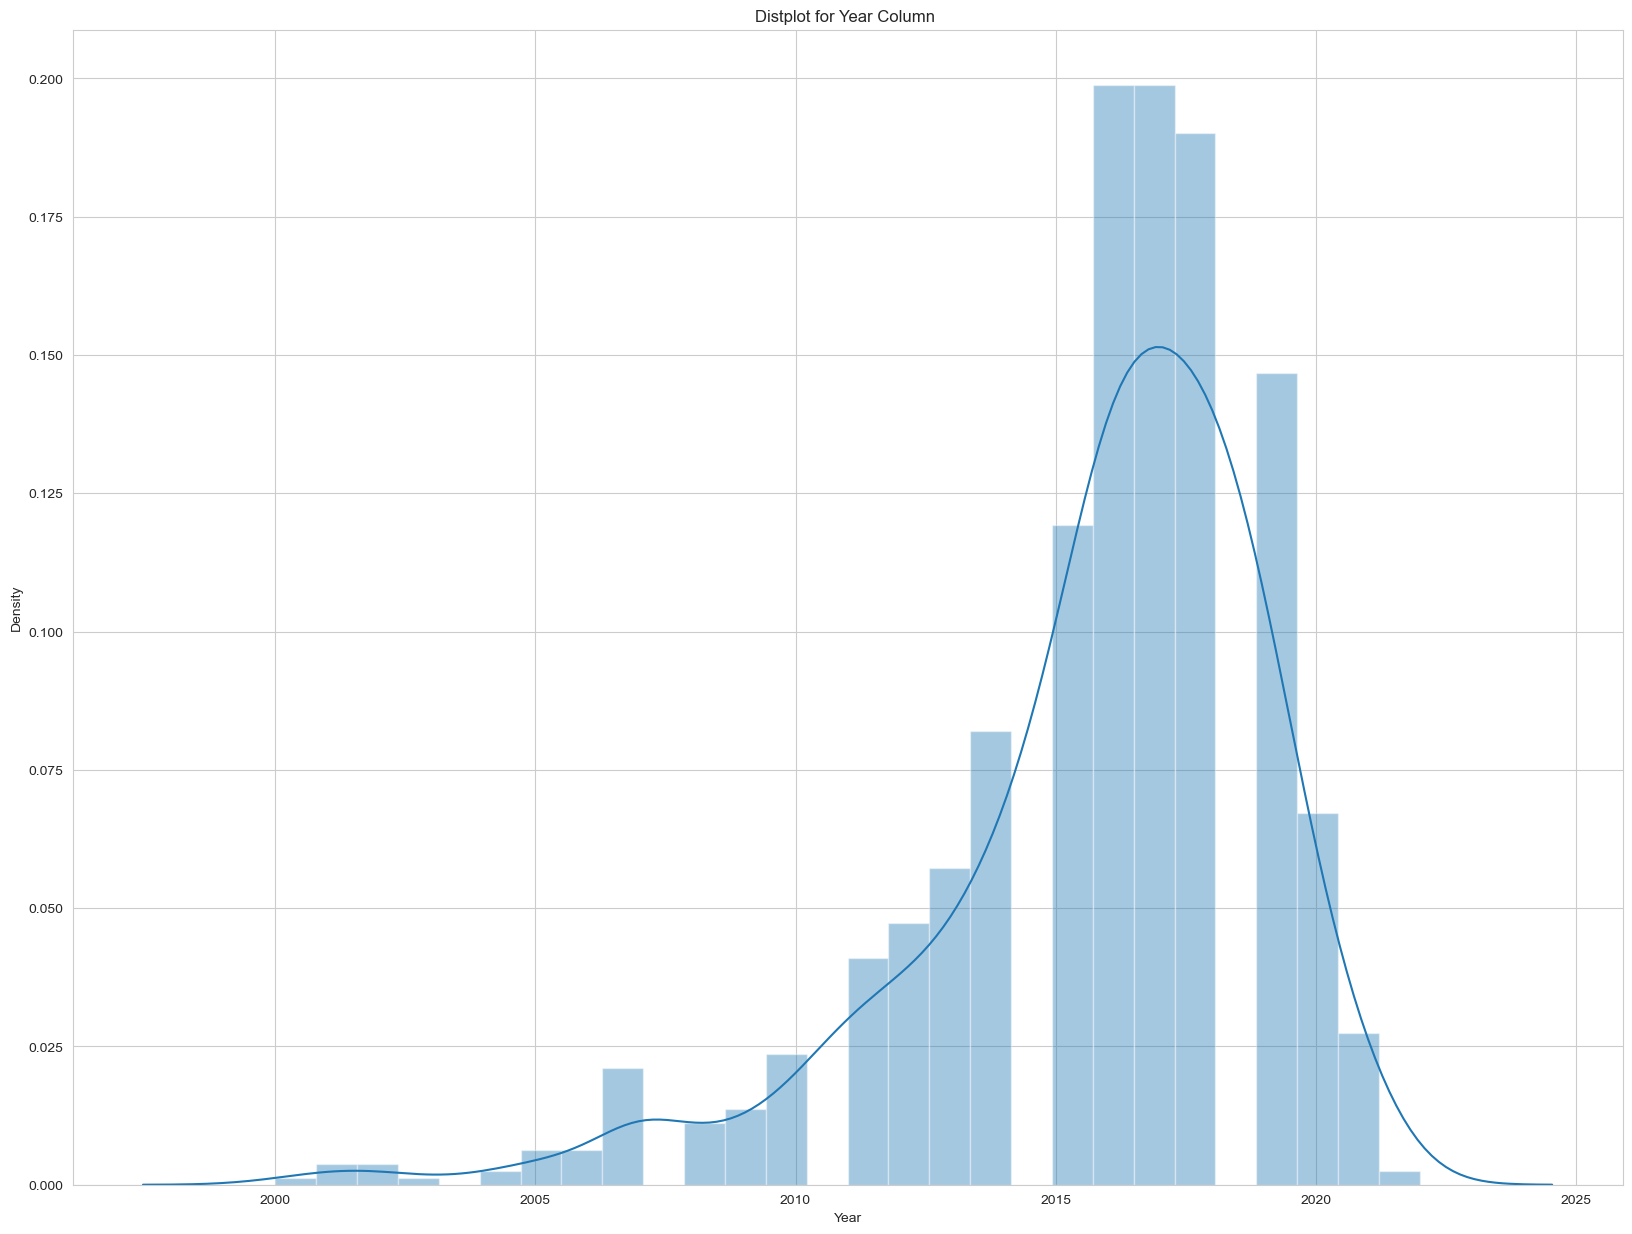

In [65]:
plt.figure(figsize=(20,15))
sns.distplot(df['Year'])
plt.xlabel('Year')
plt.ylabel('Density')
plt.title("Distplot for Year Column ")
plt.show()

# Feature Engineering And Data Preprocessing

In [66]:
dummies3=pd.get_dummies(df['Name'])
dummies3

,Audi Q3,Audi Q5 2.0,Audi Q7 3.0,Audi Q7 35,BMW 3 Series,BMW 5 Series,BMW X5 xDrive30d,Chevrolet Aveo,Chevrolet Beat,Chevrolet Beat LS,...,Volkswagen Polo,Volkswagen Polo COMFORTLINE,Volkswagen Polo Comfortline,Volkswagen Polo GT,Volkswagen Polo HIGHLINE1.2L,Volkswagen Polo Highline,Volkswagen Vento,Volkswagen Vento Highline,Volvo XC60 D3,Volvo XC90 D5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
dummies4=pd.get_dummies(df['Company'])
dummies4

,Audi,BMW,Chevrolet,Datsun,Fiat,Ford,Honda,Hyundai,Jaguar,Jeep,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1022,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df=df.drop(['Name','Company'],axis='columns')
df=pd.concat([df,dummies3,dummies4],axis='columns')
df

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,2,380000,35056,2015,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,44000,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1350000,42917,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,16112,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,30988,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,229000,65000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,275000,60000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,1,1750000,31000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,1750000,31000,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df=df.drop(df.columns[55],axis='columns')
df

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,Volvo
0,2,380000,35056,2015,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,44000,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1350000,42917,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,16112,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,30988,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,229000,65000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,275000,60000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,1,1750000,31000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,1750000,31000,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df=df.drop(df.columns[301],axis='columns')
df

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
0,2,380000,35056,2015,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,44000,2016,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1350000,42917,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,16112,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,30988,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,229000,65000,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,275000,60000,2014,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1021,1,1750000,31000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,1750000,31000,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
def normalize(feature):
    feature=feature-np.mean(feature)/np.std(feature)
    return feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [72]:
df['Kms_driven']

0       35056
1       44000
2       42917
3       16112
4       30988
        ...  
1019    65000
1020    60000
1021    31000
1022    31000
1023    31000
Name: Kms_driven, Length: 1024, dtype: int64

In [73]:
Kms_driven=np.array(df['Kms_driven'])
Kms_driven=Kms_driven.reshape(-1,1)
Kms_driven

array([[35056],
       [44000],
       [42917],
       ...,
       [31000],
       [31000],
       [31000]], dtype=int64)

In [74]:
df['Kms_driven']=scaler.fit_transform(Kms_driven)
df['Kms_driven']
#Mean=0
#Variance=1

0      -0.398319
1      -0.163683
2      -0.192094
3      -0.895296
4      -0.505039
          ...   
1019    0.387231
1020    0.256061
1021   -0.504724
1022   -0.504724
1023   -0.504724
Name: Kms_driven, Length: 1024, dtype: float64

In [75]:
df

,Label,Price,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
0,2,380000,-0.398319,2015,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,465000,-0.163683,2016,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1350000,-0.192094,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1019699,-0.895296,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,713499,-0.505039,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,229000,0.387231,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,275000,0.256061,2014,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1021,1,1750000,-0.504724,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,1750000,-0.504724,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
Y=df['Price']
Y

0        380000
1        465000
2       1350000
3       1019699
4        713499
         ...   
1019     229000
1020     275000
1021    1750000
1022    1750000
1023    1750000
Name: Price, Length: 1024, dtype: int64

In [77]:
X=df.drop(['Price'],axis='columns')
X

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
0,2,-0.398319,2015,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.163683,2016,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,-0.192094,2018,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-0.895296,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-0.505039,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,0.387231,2014,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,0.256061,2014,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1021,1,-0.504724,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,-0.504724,2017,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
Year=np.array(X['Year'])
Year=Year.reshape(-1,1)
Year

array([[2015],
       [2016],
       [2018],
       ...,
       [2017],
       [2017],
       [2017]], dtype=int64)

In [79]:
X['Year']=scaler.fit_transform(Year)
X['Year']

0      -0.241586
1       0.053622
2       0.644036
3       0.939243
4       0.348829
          ...   
1019   -0.536793
1020   -0.536793
1021    0.348829
1022    0.348829
1023    0.348829
Name: Year, Length: 1024, dtype: float64

In [80]:
X

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
0,2,-0.398319,-0.241586,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.163683,0.053622,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,-0.192094,0.644036,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-0.895296,0.939243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-0.505039,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1,0.387231,-0.536793,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,1,0.256061,-0.536793,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1021,1,-0.504724,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1,-0.504724,0.348829,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8, random_state=1)

In [82]:
X_train

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
878,1,-0.386671,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,2,-0.923628,0.348829,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
718,2,0.115578,-0.536793,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
846,2,-0.227903,-0.241586,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,2,-0.409180,0.939243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2,0.935337,0.053622,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,2,0.497807,0.348829,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,2,0.009435,0.644036,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
235,1,0.911910,-4.079280,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
Y_train

878     950000
404     462399
718     375899
846     531999
928    1045799
        ...   
767     684099
72      818599
908     462299
235      89000
37      412199
Name: Price, Length: 819, dtype: int64

In [84]:
X_test

,Label,Kms_driven,Year,Ahmedabad,Anand,Bangalore,Bhubaneswar,Bilaspur,BolpurSantiniketan,Chandigarh,...,Maruti,Mercedes,Nissan,Porsche,Renault,Skoda,Ssangyong,Tata,Volkswagen,Volvo
830,1,0.177359,-2.012829,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
795,2,-0.675665,0.939243,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
495,1,-0.006279,-0.536793,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
822,2,-0.192724,0.348829,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
859,2,0.671135,-1.422415,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2,1.200458,0.053622,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,2,-0.935801,0.939243,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1009,2,-0.795711,0.053622,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
267,2,-0.497274,-0.536793,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [85]:
Y_test

830     145000
795     473699
495     525000
822     619599
859     298599
         ...  
770     509699
582     422299
1009    294799
267     399899
974      89000
Name: Price, Length: 205, dtype: int64

# Model Selection And Comparision

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predicted=lr.predict(X_test)

print("The first five predicted values are:")
print(Y_predicted[0:5])

print("The first five testvalues are:")
print(Y_test[0:5])

The first five predicted values are:
[ 54768. 495832. 554640. 602856. 168680.]
The first five testvalues are:
830    145000
795    473699
495    525000
822    619599
859    298599
Name: Price, dtype: int64


In [91]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predicted)
r2

-6.908172287781585e+21

In [96]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X,Y,cv=10))
print(np.average(cross_val_score(lr,X,Y,cv=10)))

[-2.07366079e+22 -8.06819450e+19 -3.29786959e+20 -1.56130700e+20
 -5.26520494e+21 -1.85936995e+21 -5.83002656e+20 -1.05276444e+24
 -5.66629901e+20 -2.33698691e+21]
-1.0846788396745584e+23


In [106]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,Y_train)

Y_predicted=lasso.predict(X_test)

print("The first five predicted values are:")
print(Y_predicted[0:5])

print("The first five testvalues are:")
print(Y_test[0:5])

The first five predicted values are:
[ 54617.31480542 495662.67699778 555135.41993914 602681.04397802
 168219.88719691]
The first five testvalues are:
830    145000
795    473699
495    525000
822    619599
859    298599
Name: Price, dtype: int64


C:\Users\Shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e+12, tolerance: 2.437e+10
  model = cd_fast.enet_coordinate_descent(


In [107]:
r2=r2_score(Y_test,Y_predicted)
r2

0.5757236881902037

In [108]:
scores=cross_val_score(lasso,X,Y,cv=10)
print(scores)
print(np.average(scores))

C:\Users\Shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+12, tolerance: 2.664e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.712e+12, tolerance: 2.315e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.070e+12, to

[0.45611609 0.21607656 0.63139216 0.7733234  0.79439837 0.68477346
 0.36140978 0.60645851 0.28452126 0.47062286]
0.5279092442611836


C:\Users\Shaunak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+12, tolerance: 2.700e+10
  model = cd_fast.enet_coordinate_descent(


In [110]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)

Y_predicted=ridge.predict(X_test)

print("The first five predicted values are:")
print(Y_predicted[0:5])

print("The first five testvalues are:")
print(Y_test[0:5])

The first five predicted values are:
[ -3205.73477789 514389.84356959 557252.25993489 605018.01905754
 115919.60342649]
The first five testvalues are:
830    145000
795    473699
495    525000
822    619599
859    298599
Name: Price, dtype: int64


In [111]:
r2=r2_score(Y_test,Y_predicted)
r2

0.7292530445275576

In [112]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

Y_predicted=dtr.predict(X_test)

print("The first five predicted values are:")
print(Y_predicted[0:5])

print("The first five testvalues are:")
print(Y_test[0:5])

The first five predicted values are:
[190000. 485299. 580899. 562399. 362999.]
The first five testvalues are:
830    145000
795    473699
495    525000
822    619599
859    298599
Name: Price, dtype: int64


In [113]:
r2=r2_score(Y_test,Y_predicted)
r2

0.5393010101602088

In [116]:
import pickle

with open('CarPricePrediction.pickle','wb') as f:
    pickle.dump(dtr,f)

In [117]:
with open('CarPricePrediction.pickle','rb') as f:
    mp= pickle.load(f)